In [1]:
import pandas as pd
import numpy as np

In [2]:
pwd

'/Users/luis/Ironhack_DAFT_ClassLab/ClassLabDay4'

In [3]:
cd ..

/Users/luis/Ironhack_DAFT_ClassLab


In [4]:
data=pd.read_csv('ClassLabDay3/marketing_customer_analysis.csv')

In [5]:
def standarize_col(col):
    return col.lower().replace(" ", "_")

new_cols = []
for col in data.columns.to_list():
    new_cols.append(standarize_col(col))
    
import statistics as stats

def data_trans(data):
    data.columns = new_cols
    data = data.rename({'unnamed:_0': 'unnamed'}, axis=1)
    data["state"].fillna("Unkown", inplace = True)
    data["response"].fillna("Unkown", inplace = True)
    data["vehicle_class"].fillna("Unkown", inplace = True)
    data["vehicle_size"].fillna("Unkown", inplace = True)
    data["vehicle_type"].fillna("Unkown", inplace = True)
    mean_months_since_last_claim = round(stats.mean(data["months_since_last_claim"].dropna()),2)
    mean_number_of_open_complaints = round(stats.mean(data["number_of_open_complaints"].dropna()),2)
    data["months_since_last_claim"] = data["months_since_last_claim"].replace(to_replace = np.nan, value = mean_months_since_last_claim)
    data["number_of_open_complaints"] = data["number_of_open_complaints"].replace(to_replace = np.nan, value = mean_number_of_open_complaints)
    data['effective_to_date']=pd.to_datetime(data['effective_to_date'], errors = "coerce")
    data['month_number'] = data['effective_to_date'].dt.strftime('%-m')
    data = data.query('month_number == "1" or month_number == "2" or month_number == "3"')
    return data 

In [6]:
df = data_trans(data)

### 1. Show DataFrame info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10910 entries, 0 to 10909
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10910 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10910 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

### 2. Describe DataFrame

In [8]:
df.describe()

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,5454.500000,8018.241094,37536.284785,93.196059,15.149125,48.091934,0.384009,2.979193,434.888330
std,3149.590053,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556
min,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2727.250000,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527
50%,5454.500000,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630
75%,8181.750000,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.380000,4.000000,547.200000
max,10909.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 3. Show a plot of the total number of responses (for each response type - "Yes"/"No")

In [9]:
df["response"]

0            No
1            No
2            No
3           Yes
4            No
          ...  
10905        No
10906        No
10907        No
10908        No
10909    Unkown
Name: response, Length: 10910, dtype: object

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

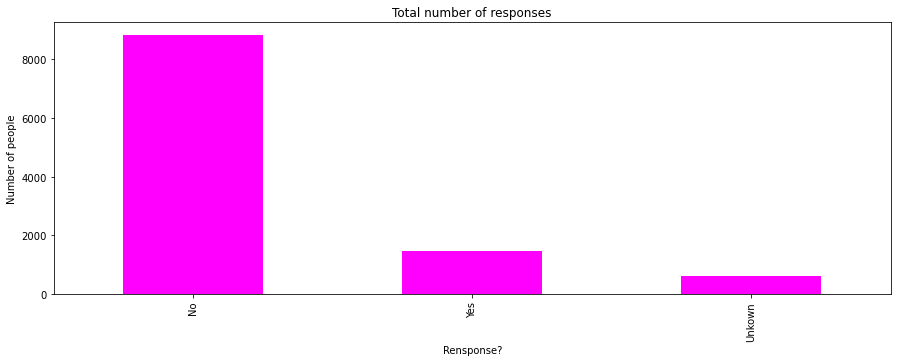

In [11]:
plt.figure(figsize=(15,5))
df['response'].value_counts().plot(kind='bar', color='magenta')
plt.xlabel("Rensponse?")
plt.ylabel("Number of people")
plt.title("Total number of responses")
plt.show()

### 4. Show a plot of the rate of the response types by each Sales Channel

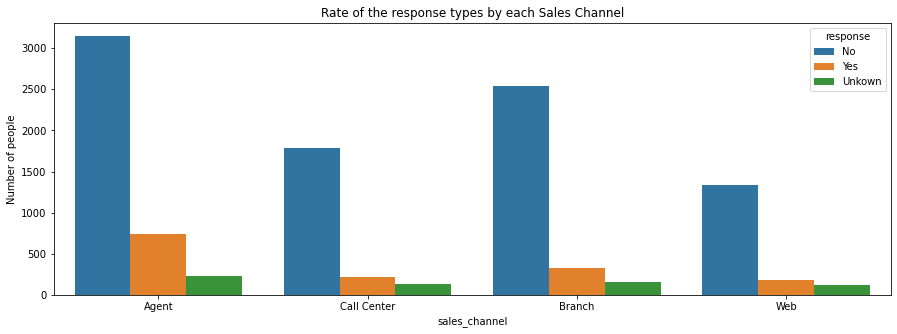

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x="sales_channel", hue="response", data=df)
plt.ylabel("Number of people")
plt.title("Rate of the response types by each Sales Channel")
plt.show()

### 5. Show a plot of the distribution of the Total Claim Amount, broken down by response type. Try a boxplot and distribution plot, for each response type. For the distribution plot, try to plot both kinds of responses in one chart (seaborn's histplot, using the 'hue' parameter is very convenient here).

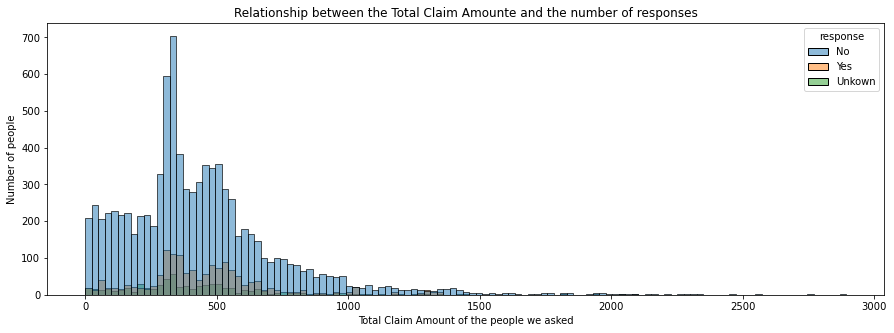

In [18]:
plt.figure(figsize=(15,5))
sns.histplot(data= df, x= "total_claim_amount", hue="response")
plt.ylabel("Number of people")
plt.xlabel("Total Claim Amount of the people we asked")
plt.title("Relationship between the Total Claim Amounte and the number of responses")
plt.show()

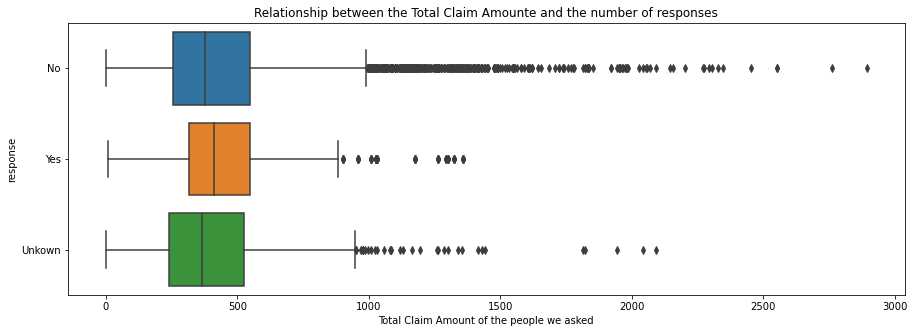

In [19]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df["response"], x=df["total_claim_amount"], data=df)
plt.xlabel("Total Claim Amount of the people we asked")
plt.title("Relationship between the Total Claim Amounte and the number of responses")
plt.show()

### Create similar plots like in the task before, but for Income

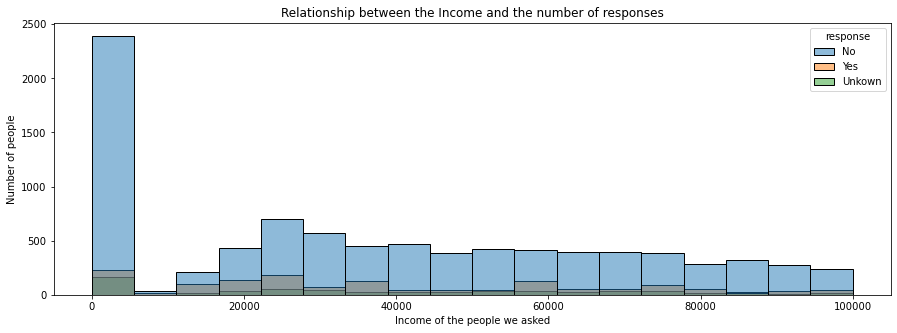

In [20]:
plt.figure(figsize=(15,5))
sns.histplot(data= df, x= "income", hue="response")
plt.ylabel("Number of people")
plt.xlabel("Income of the people we asked")
plt.title("Relationship between the Income and the number of responses")
plt.show()

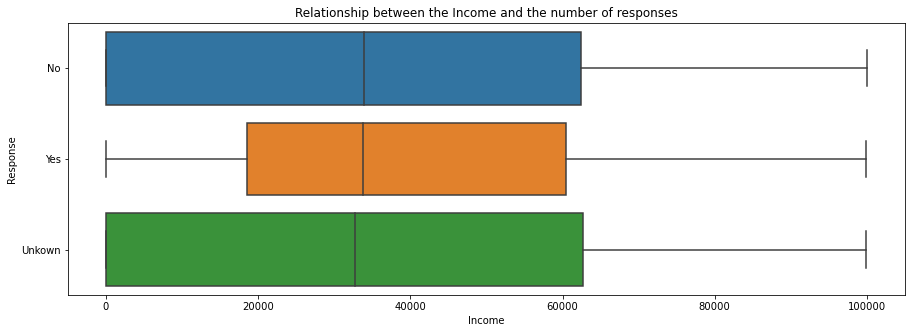

In [23]:
plt.figure(figsize=(15,5))
sns.boxplot(y=df["response"], x=df["income"], data=df)
plt.ylabel("Response")
plt.xlabel("Income")
plt.title("Relationship between the Income and the number of responses")
plt.show()

### 6. Create a scatterplot between Total Claim Amount and Income. Play around with the settings of the scatterplot (markersize, alpha level, ...) and in doing so try to identify more features within the data just visually. You can also try different seaborn plots. Check for example this link which explains how to avoid overplotting.

<AxesSubplot:xlabel='income', ylabel='total_claim_amount'>

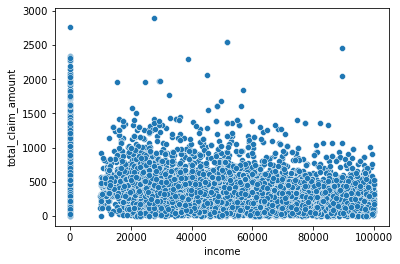

In [43]:
sns.scatterplot(x=df["income"] , y= df["total_claim_amount"])

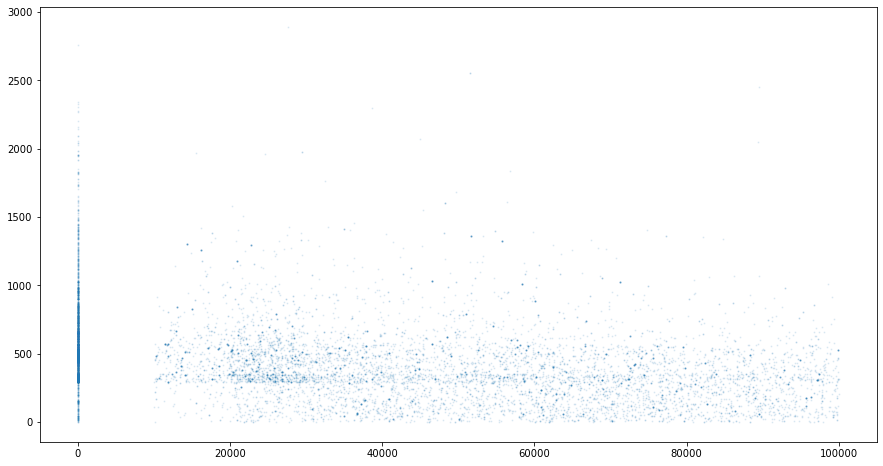

In [55]:
plt.figure(figsize=(15,8))
plt.scatter(x=df["income"] , y= df["total_claim_amount"], s=1, alpha=0.1, marker="o")
plt.show()

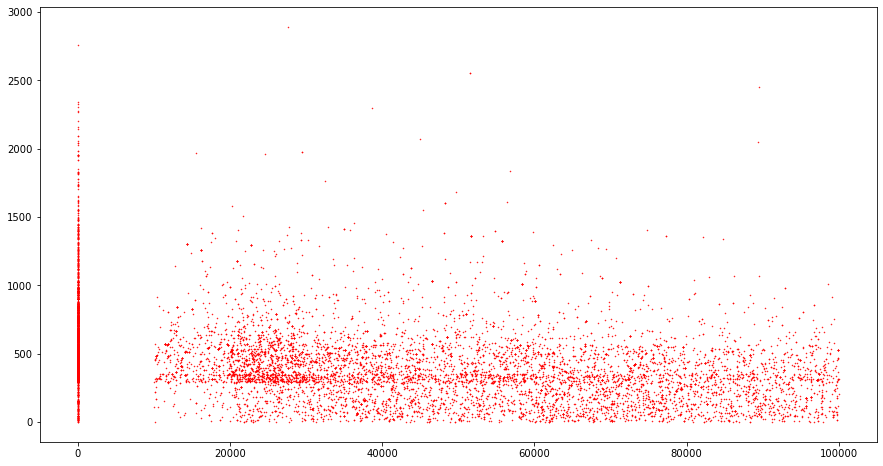

In [72]:
plt.figure(figsize=(15,8))
plt.plot("income" ,"total_claim_amount", data=df, linestyle='', marker='o', markersize=0.5, color='red')
plt.show()